In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Задача 1
## Когда убедимся, что монетка нечестная?
**Условия:**  
Подкинули монету N раз. Кол-во случаев, когда выпал орёл, на 10% больше, чем кол-во случаев, когда выпала решка.  
  
**Вопрос:**  
При каком N мы можем сказать, что монета «нечестная» (орёл и решка выпадают с разной вероятностью)?

**Решение:**  
Если рассматривать постановку вопроса строго, то точно (без погрешности) можно будет сказать при $ n \to +\infty $, т.е.
$$ \lim_{n \to +\infty} \delta(n) = 0,\quad где\ n\in N $$
  
Если же дополнить задачу условием, что действия происходят в реальном Мире и мы ограничены вычислительными мощностями, то придётся выбрать допустимую погрешность $\delta$ и необходимую уверенность $\gamma$. 
<!-- Для начала, выберем погрешность 0.05  -->

Из условия задачи известно, что на рассматриваемой выборке орлов выпадет на 10% больше, чем решек. Поскольку задача состоит в том, чтобы найти N, при котором мы сможем утверждать, что монетка "нечестная", то будем считать, что она действительно нечестная и различие в 10% созраняется на бесконечно большой выборке. Тогда мы можем вычислить вероятность появления орла или решка, описав полную систему событий:
    $$ p + q = p + (1 - p) = 1 $$
где p - вероятность появления решка, q - орла. Накладывая ограничение из условия можем записать:
    $$ q = 1 - p = 1.1 \cdot p $$
    $$ p = \frac{1}{2.1}\quad \Rightarrow \quad q = (1 - p) = \frac{1.1}{2.1}$$
Воспользуемся доверительным интервалом для того, чтобы с некоторой погрешностью $\delta$ оценить количество необходимых жкспериментов с монеткой:
    $$ \frac{tails}{N} - \delta\ <\ p\ <\ \frac{tails}{N} + \delta $$
или 
    $$ P(|{\frac{tails}{N} - p}|\ <\ \delta) = \gamma $$
также известно, что:
    $$ \gamma = 2 \cdot \Phi(\delta \cdot \frac{\sqrt{N}}{\sqrt{p \cdot q}}) $$
Тогда
$$ \Phi(\delta \cdot \frac{\sqrt{N}}{\sqrt{p \cdot q}}) = \frac{\gamma}{2} $$ 

Используя таблицу значений функции Лапласа можем найти аргумент при данном значении функции. Обозначим его $\phi$:
$$ \delta \cdot \frac{\sqrt{N}}{\sqrt{p \cdot q}} = \phi $$

Тогда, зная $\phi$ и $\delta$, можно однозначно найти N:
$$ N =  \phi^2 \cdot \frac{p \cdot q}{\delta^2} $$

$p$ и $q$ нам уже известны. Осталось выбрать $\gamma$ (от которого зависит $\phi$) и $\delta$. Возьмём $\gamma = 0.95$. 
$$ \Phi(\delta \cdot \frac{\sqrt{N}}{\sqrt{p \cdot q}}) = \frac{0.95}{2} = 0.475 $$
Используя таблицу значений функции Лапласа находим, что аргумент при данном значении функции равен $\phi = 1.96$.  
И рассмотрим часто используемое $\delta = 0.05$. 

Итак
    $$ N =  \lceil {1.96^2 \cdot \frac{\frac{1}{2.1} \cdot \frac{1.1}{2.1}}{0.05^2}} \rceil = 384 $$
  
<!-- ==================================================================
$$ p + q = p + (1 - p) = 1 p + 1.1 \cdot p = \frac{1 + 1.1}{2.1} = 1 $$
$$ \Rightarrow p = \frac{1}{2.1},\quad q = \frac{1.1}{2.1} $$
$$ tails =  $$

Тогда число выпадений монеты орлом будет 
$$eagle = 1.1 \cdot x$$ 

Имеем вероятности выпадения решка и орла:
$$ P(tails) = \frac{x}{N} $$  
$$ P(eagle) = \frac{1.1 \cdot x}{N} $$

Полная система событий будет описываться выражением:  
$$ P(tails) + P(eagle) = 1 $$  
или
$$ \frac{x}{N} + \frac{1.1 \cdot x}{N} = 1 $$
Следовательно  
$$ \frac{2.1 \cdot x}{N} = 1 $$ 
-->

In [2]:
def N(delta=0.05, phi=1.96, p=1/2.1, q=1.1/2.1):
    N = np.square(phi) * p * q / np.square(delta)
    return np.ceil(N).astype(int)

In [23]:
delta = 0.05
n = N(delta)
print(f"при delta = {delta}, N = {n}")

при delta = 0.05, N = 384


### Посмотрим, как возрастает необходимое количество экспериментов  при увеличении требований к точности

In [25]:
delta = [0.1, 0.05, 0.01]
for d in delta:
    n = N(d)
    print(f"при delta = {d}, N = {n}")

при delta = 0.1, N = 96
при delta = 0.05, N = 384
при delta = 0.01, N = 9583


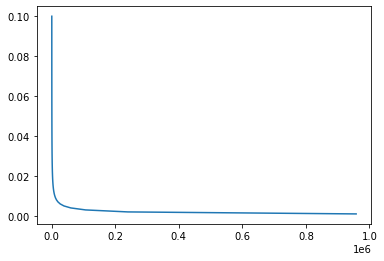

In [5]:
# Wide range
few_delta = np.linspace(0.001, 0.1, 100)
n = N(few_delta)
plt.plot(n, few_delta);

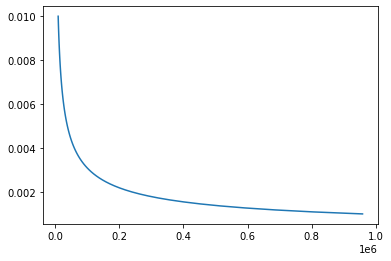

In [6]:
# Refined range
few_delta = np.linspace(0.001, 0.01, 100)
n = N(few_delta)
plt.plot(n, few_delta);

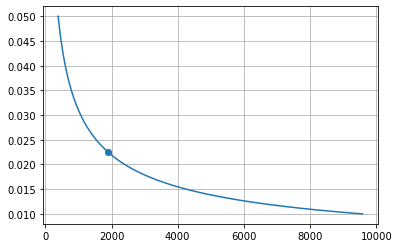

In [18]:
few_delta = np.linspace(0.01, 0.05, 100)
n = N(few_delta)
plt.plot(n, few_delta)
plt.grid()
plt.scatter(N(0.0225), 0.0225);

In [26]:
N(0.5), N(0.1), N(0.05), N(0.0225), N(0.01)
delta = [0.5, 0.1, 0.05, 0.0225, 0.01]
for d in delta:
    n = N(d)
    print(f"при delta = {d}, N = {n}")

при delta = 0.5, N = 4
при delta = 0.1, N = 96
при delta = 0.05, N = 384
при delta = 0.0225, N = 1893
при delta = 0.01, N = 9583


# Заключение:
Выбор количества необходимых эскпериментов с монеткой является, с одной стороны, условным. С другой стороны, в пользу выбора того или иного количества наблюдений могут быть высказаны аргументы. Всё упирается в риски, которые возникнуть в случае ошибки. Условно разделим их на три категории:
1. **Малые затраты от рисков**  
Пример: Вы поспорили с другом  
В данном случае я бы рекомендовал ориентироваться на 4-96 испытаний
2. **Средние затраты от рисков**   
Как ориентир выбрал бы $ N = 384 $
3. **Большие затраты от рисков**  
Свойственно высоко нагурженным системам. Например, монетка подкидывается очень большое количество раз и перекос математического ожидания в сторону от 1/2 приводит к большим затратам по абсолютному значению некоторой, зависимой от результатов бросков монетки величины. Предположим, некий игрок в казино сделал подлог монетки (честную заменил на нечестную) и играет без остановки, ставя всё время на орла. Также он рассказал об этом своим друзьям и знакомым, которые часто захаживают в казино, попытать счастья в лотерее с положительным мат.ожиданием.  
В этом случае, необходимо делать выбор в зависимости от отношения затрат на тестирование монетки и затрат на ошибки. Исходя из последнего графика мы можем заметить, что в рассматриваемом диапазоне при $\delta > 0.05$ начинается заметное возрастание затрат на испытания. В точке $\delta \approx 0.0225$ происходит перелом (скорость изменения угола касательной к функции резко увеличивается, сам угол уменьшается). Вероятно, имеет смысл рассмотреть диапазон значений $N \in [384, 1893] $. Необходим учёт экономического или прочего(-их) факторов, связанных с важностью понимания истинной честности/нечестности монетки.
  
В любом случае, выбор количества испытаний это trade-off соглашение между затратами на проверки и затратами на потенциальные убытки от рисков.